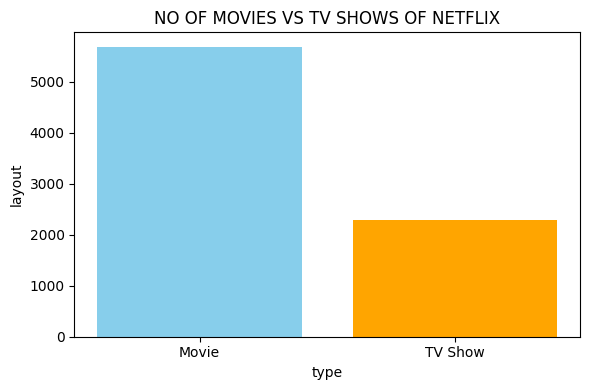

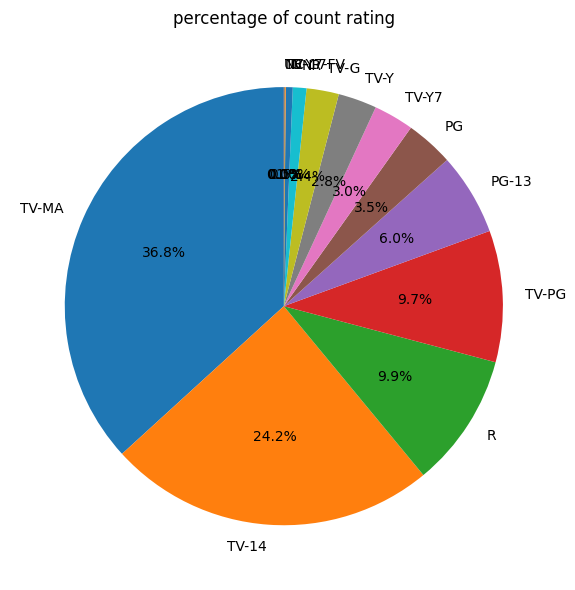

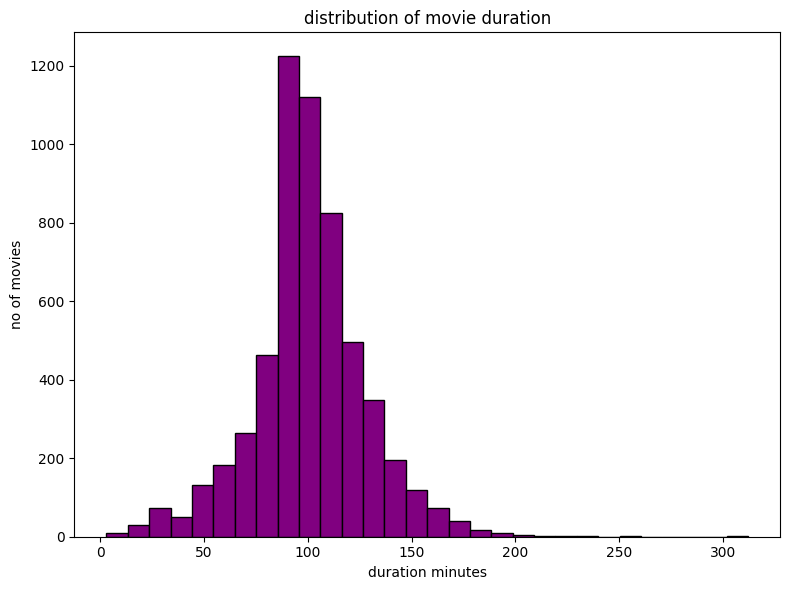

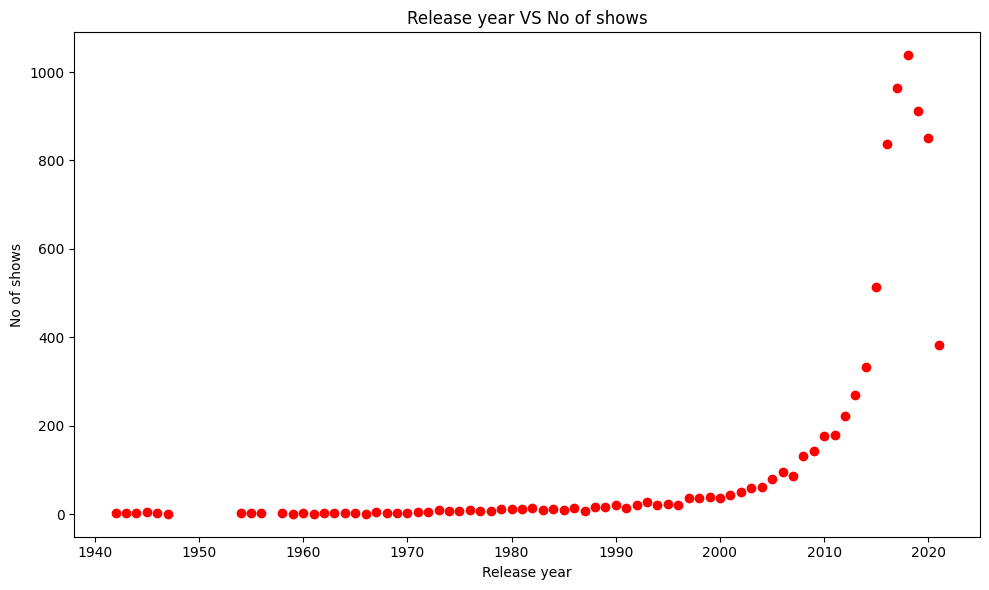

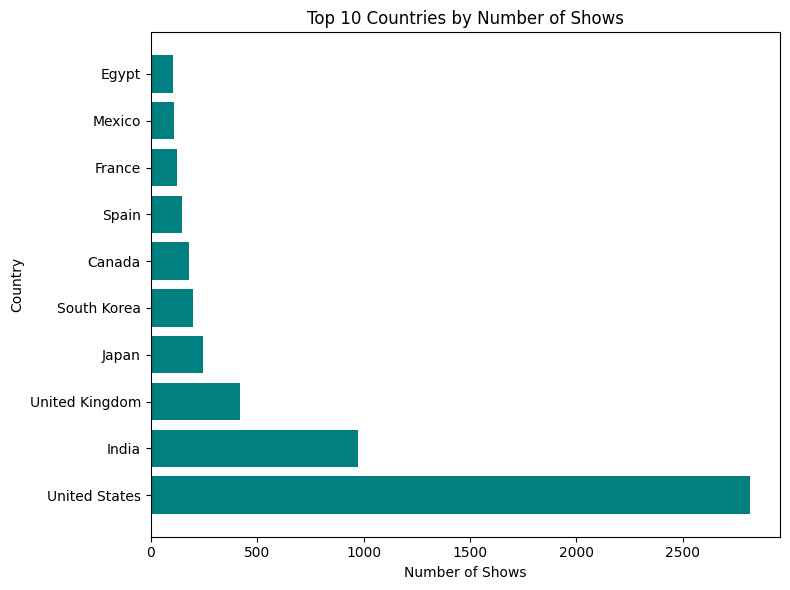

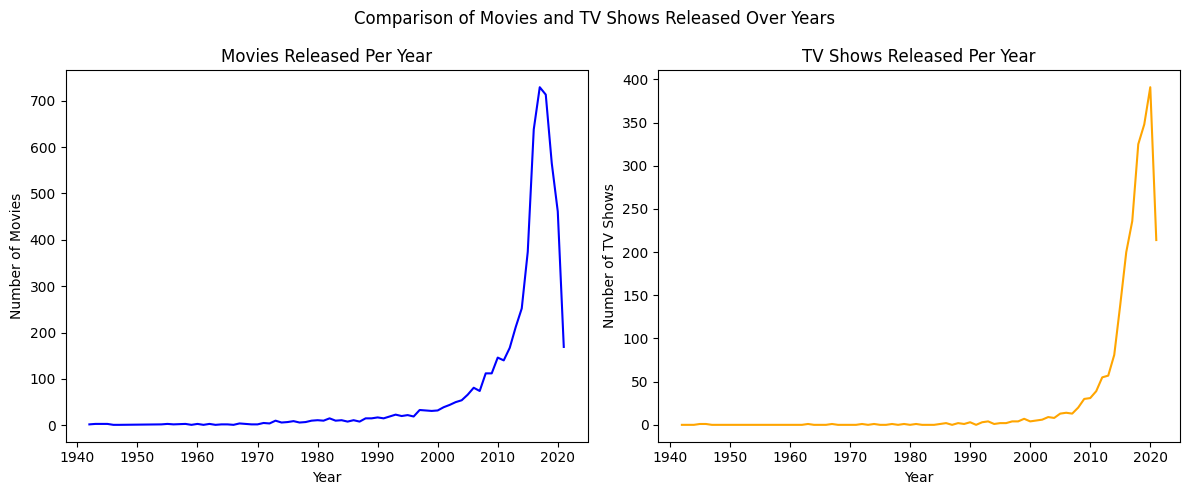

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

#load_data
data = pd.read_csv("netflix_titles.csv")

#clean_data
data = data.dropna(subset=['type','release_year','rating','country','duration'])

type_counts = data['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=['skyblue','orange'])
plt.title('NO OF MOVIES VS TV SHOWS OF NETFLIX')
plt.xlabel('type')
plt.ylabel('layout')
plt.tight_layout()
plt.savefig('movie_vs_tv_shows.png')
plt.show()

rating_counts = data['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts, labels = rating_counts.index, autopct='%1.1f%%',startangle = 90)
plt.title('percentage of count rating')
plt.tight_layout()
plt.savefig('content_rating.png')
plt.show()

movie_data = data[data['type']=='Movie'].copy()
movie_data['duration_int'] = movie_data['duration'].str.replace('min','').astype(int)
plt.figure(figsize=(8,6))
plt.hist(movie_data['duration_int'], bins=30, color='purple', edgecolor='black')
plt.title('distribution of movie duration')
plt.xlabel('duration minutes')
plt.ylabel('no of movies')
plt.tight_layout()
plt.savefig('movie_vs_tv_shows.png')
plt.show()

release_counts = data['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values, color='red')
plt.title('Release year VS No of shows')
plt.xlabel('Release year')
plt.ylabel('No of shows')
plt.tight_layout()
plt.savefig('release_year_scatter.png')
plt.show()

country_counts = data['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index, country_counts.values, color='teal')
plt.title('Top 10 Countries by Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top10_countries.png')
plt.show()

content_by_year = data.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# first subplot: movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

# second subplot: TV Shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[1].set_title('TV Shows Released Per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of TV Shows')

fig.suptitle('Comparison of Movies and TV Shows Released Over Years')
plt.tight_layout()
plt.savefig('movies_tv_shows_comparison.png')
plt.show()


